# Importing All the Necessary Liabraries

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Data Collection and Data Preprocessing

In [15]:
# Loading the dataset to pandas dataframe
data = pd.read_csv('../data/Copy of sonar data.csv', header=None)

In [16]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [18]:
# Getting the shape of the data
data.shape

(208, 61)

In [17]:
# Checking If contains any null values
isnull = data.isnull().sum().values
isnull

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
data.describe() # describe() --> Statistical Measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [21]:
data[60].value_counts() # as this datasets contains

M    111
R     97
Name: 60, dtype: int64


# M --> Mine  R --> Rock

In [24]:
data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


# Separating the Data and Labels

In [25]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [26]:
print(x)
print(y)

[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]
['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [31]:
# Standardizing the features data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

# Train the machine learning model  

In [33]:
lr = LogisticRegression()
model = lr.fit(x_train, y_train)

# Getting the prediction

In [34]:
y_pred = model.predict(x_test)

Getting the accuracy values, recall values, precision values, f1_score

In [37]:
pd.DataFrame({
    'Accuracy': [accuracy_score(y_test, y_pred, normalize=True)],
    'Precision': [precision_score(y_test, y_pred, average='macro')],
    'Recall': [recall_score(y_test,y_pred, average='macro')],
    'F1_score': [f1_score(y_test, y_pred, average='macro')]
})

,Accuracy,Precision,Recall,F1_score
0,0.809524,0.804545,0.822115,0.805556


In [39]:
# Displaying the confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[20,  6],
       [ 2, 14]])

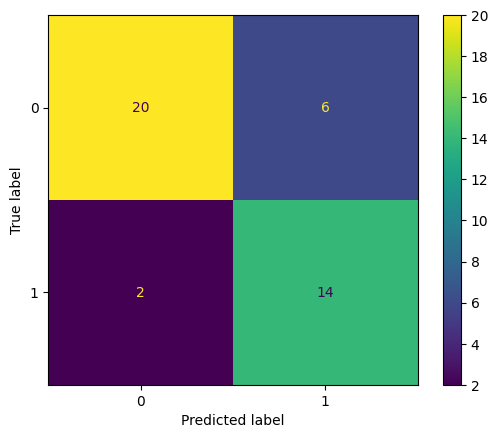

In [40]:
disp = ConfusionMatrixDisplay(con_mat, display_labels=[0,1])
disp.plot()

In [63]:
k = 5
cv = KFold(k, shuffle=True, random_state=21)
params = {"fit_intercept": [True, False], "penalty" : ['l1', 'l2'],
          "max_iter": [100,1000,10000,100000, 1000000], "C": [0.2, 0.25, 0.5, 1, 2, 3, 4, 5],
          "tol" : [0.1, 0.01, 0.001, 0.0001],
           "solver" : ['saga', 'liblinear']}
Grids = GridSearchCV(lr, params, n_jobs=-1, cv=cv)
model = Grids.fit(x_train, y_train)
model.best_params_

{'C': 1,
 'fit_intercept': True,
 'max_iter': 100000,
 'penalty': 'l1',
 'solver': 'saga',
 'tol': 0.1}

In [65]:
y_pred_gs = model.predict(x_test)
np.mean(y_test == y_pred_gs)

0.8095238095238095

# Making a predictive system

In [64]:
# Seting the values of input data for prediction
input_data = (0.0265,0.0440,0.0137,0.0084,0.0305,0.0438,0.0341,0.0780,0.0844,0.0779,0.0327,0.2060,0.1908,0.1065,0.1457,0.2232,0.2070,0.1105,0.1078,0.1165,0.2224,0.0689,0.2060,0.2384,0.0904,0.2278,0.5872,0.8457,0.8467,0.7679,0.8055,0.6260,0.6545,0.8747,0.9885,0.9348,0.6960,0.5733,0.5872,0.6663,0.5651,0.5247,0.3684,0.1997,0.1512,0.0508,0.0931,0.0982,0.0524,0.0188,0.0100,0.0038,0.0187,0.0156,0.0068,0.0097,0.0073,0.0081,0.0086,0.0095)

# Setting the input data in form of array
input_data = np.array(input_data)

# Reshaping the Input data
input_data = input_data.reshape(1,-1)


input_data = sc.transform(input_data)


#Initiating the GridSearch Logistic Regression
lr = LogisticRegression()
model = lr.fit(x_train, y_train)


# Getting the prediction
prediction = model.predict(input_data)

# Producing the output
if len(prediction[0]) == 0:
  print('ERROR input data Provided')
else:
  if prediction[0] == 'M':
    print('the object is MINE')
  elif prediction[0] == 'R':
    print("the object is ROCK")

the object is ROCK
